# User activity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data, with all columns with string data type, for now
data = pd.read_csv('data.csv', dtype='str')
# change data type to time stamp in 'event_timestamp'
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[s]')

In [3]:
# create a month column
data['month'] = pd.DatetimeIndex(data['event_timestamp']).month
# a week column
data['week'] = data['event_timestamp'].dt.isocalendar().week
# and a day column (1-366) 2020 was a leap year
data['day'] = pd.DatetimeIndex(data['event_timestamp']).day_of_year
# create a new column with the day of the week
data['day_of_week'] = data['event_timestamp'].dt.day_name()
# save csv
data.to_csv('data1.csv', index=False)
data.head()

,event_id,event_timestamp,page_title,organization_id,user_id,month,week,day,day_of_week
0,ajs-51c205dff7f3f3541943fc69498875cc,2020-01-02 11:47:43,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
1,ajs-e49668e966f11460a35c70e9cab9edcd,2020-01-02 11:48:07,Welcome,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
2,ajs-0aedceadad5d3d4f8ec2367bd4230c39,2020-01-02 11:48:16,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,2,Thursday
3,ajs-90802aefaa8f58920c8dfcce19304fad,2020-01-05 16:30:59,Job position,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday
4,ajs-8354ae15e8bbe83e06efc759737c0932,2020-01-05 16:31:04,All job positions,18f6d076-394c-41d2-8ec6-e8b870535798,27f92d62-dbaa-4512-8b31-5ef541716695,1,1,5,Sunday


In [4]:
def active_agents(df, agent, period):
    '''Function that outputs a dataset with the number of active agent (user or organization) 
    per period (month, year, day)'''
    # group by period and count the number of unique id
    active_agents = pd.DataFrame(df.groupby(period)[agent].nunique()).reset_index()
    # rename the column
    active_agents = active_agents.rename(columns={agent: 'N active ' +str(agent)})
    active_agents = active_agents.transpose()
    return active_agents

In [5]:
# active users per month
active_users_month = active_agents(data, 'user_id', 'month')
active_users_month

,0,1,2,3,4,5,6,7,8,9,10,11
month,1,2,3,4,5,6,7,8,9,10,11,12
N active user_id,80,84,149,139,161,132,80,119,166,173,174,181


In [6]:
# active organizations per month
active_orgs_month = active_agents(data, 'organization_id', 'month')
active_orgs_month

,0,1,2,3,4,5,6,7,8,9,10,11
month,1,2,3,4,5,6,7,8,9,10,11,12
N active organization_id,7,9,10,14,16,18,17,17,20,23,28,32


In [7]:
round(active_users_month.transpose().describe())

,month,N active user_id
count,12.0,12.0
mean,6.0,136.0
std,4.0,38.0
min,1.0,80.0
25%,4.0,110.0
50%,6.0,144.0
75%,9.0,168.0
max,12.0,181.0


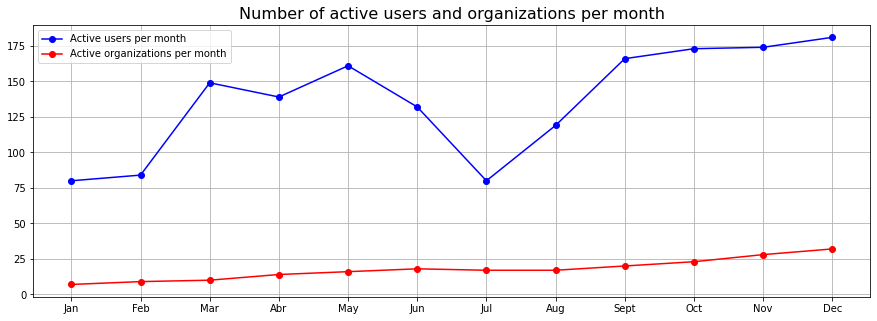

In [8]:
period =  ['Jan', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
users = active_users_month.transpose()['N active user_id'].values
orgs = active_orgs_month.transpose()['N active organization_id'].values

plt.figure(figsize=(15,5))
plt.plot(period, users, 'bo-', label='Active users per month')
plt.plot(period, orgs, 'ro-', label='Active organizations per month')
plt.title('Number of active users and organizations per month', fontsize = 16)
plt.grid(True)
plt.legend()
plt.savefig('figures/1/1_active_month', bbox_inches='tight')
plt.show()

In [9]:
# active users per week
active_users_week = active_agents(data, 'user_id', 'week')
active_users_week

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
N active user_id,1,13,40,23,38,68,21,24,26,24,...,85,98,84,91,89,94,116,94,52,28


In [10]:
# active organizations per week
active_orgs_week = active_agents(data, 'organization_id', 'week')
active_orgs_week

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
week,1,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
N active organization_id,1,3,5,5,7,8,7,8,7,8,...,23,23,23,27,28,29,30,30,22,14


In [11]:
active_users_week.transpose().describe()

,week,N active user_id
count,53.000000,53.000000
mean,27.000000,57.886792
std,15.443445,28.590383
min,1.000000,1.000000
25%,14.000000,35.000000
50%,27.000000,56.000000
75%,40.000000,80.000000
max,53.000000,117.000000


In [12]:
# peaks in users weekly activity
active_users_week.transpose()[active_users_week.transpose()['N active user_id'] > 80]

,week,N active user_id
12,13,117
19,20,93
36,37,92
37,38,85
42,43,99
43,44,85
44,45,98
45,46,84
46,47,91
47,48,89


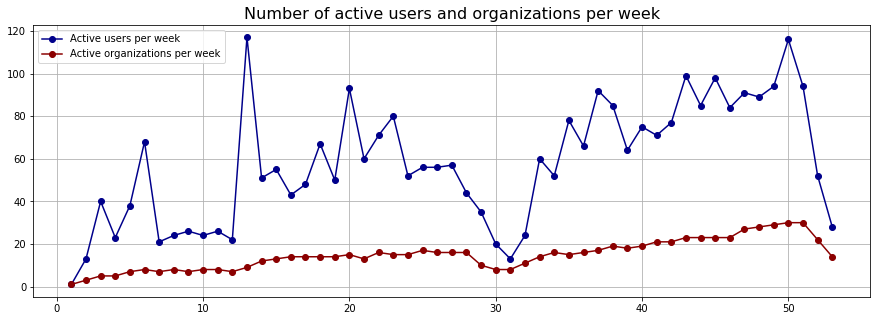

In [13]:
period = active_users_week.transpose()['week'].values
users = active_users_week.transpose()['N active user_id'].values
orgs = active_orgs_week.transpose()['N active organization_id'].values

plt.figure(figsize=(15,5))
plt.plot(period, users, color='darkblue', marker='o', label='Active users per week')
plt.plot(period, orgs, color='darkred', marker='o', label='Active organizations per week')
plt.title('Number of active users and organizations per week', fontsize = 16)
plt.grid(True)
plt.legend()
plt.savefig('figures/1/2_active_week', bbox_inches='tight')
plt.show()

In [14]:
# active users per day
active_users_day = active_agents(data, 'user_id', 'day')
active_users_day

,0,1,2,3,4,5,6,7,8,9,...,343,344,345,346,347,348,349,350,351,352
day,2,5,6,7,8,9,10,11,12,13,...,355,356,357,358,359,362,363,364,365,366
N active user_id,1,1,1,2,2,2,9,3,2,7,...,5,36,31,12,1,3,10,14,10,3


In [15]:
round(active_users_day.transpose().describe())

,day,N active user_id
count,353.0,353.0
mean,185.0,17.0
std,104.0,14.0
min,2.0,1.0
25%,95.0,4.0
50%,184.0,15.0
75%,275.0,28.0
max,366.0,66.0


In [16]:
# active organizations per day
active_orgs_day= active_agents(data, 'organization_id', 'day')
active_orgs_day

,0,1,2,3,4,5,6,7,8,9,...,343,344,345,346,347,348,349,350,351,352
day,2,5,6,7,8,9,10,11,12,13,...,355,356,357,358,359,362,363,364,365,366
N active organization_id,1,1,1,1,2,2,2,2,1,3,...,4,16,18,9,1,3,6,9,9,3


In [17]:
round(active_orgs_day.transpose().describe())

,day,N active organization_id
count,353.0,353.0
mean,185.0,8.0
std,104.0,6.0
min,2.0,1.0
25%,95.0,3.0
50%,184.0,7.0
75%,275.0,12.0
max,366.0,24.0


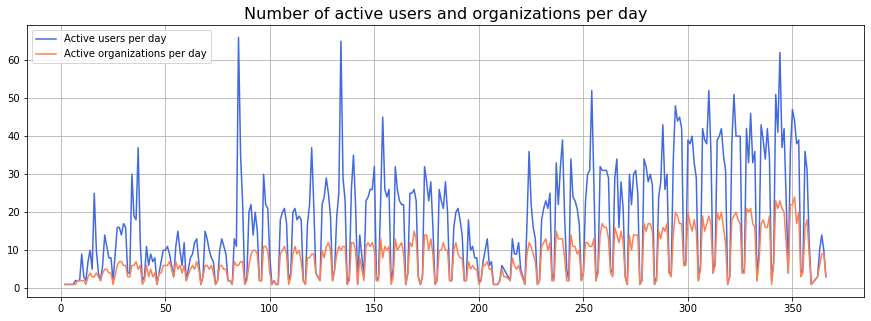

In [18]:
period = active_users_day.transpose()['day'].values
users = active_users_day.transpose()['N active user_id'].values
orgs = active_orgs_day.transpose()['N active organization_id'].values

plt.figure(figsize=(15,5))
plt.plot(period, users, color='royalblue', label='Active users per day')
plt.plot(period, orgs, color='coral', label='Active organizations per day')
plt.title('Number of active users and organizations per day', fontsize = 16)
plt.grid(True)
plt.legend()
plt.savefig('figures/1/3_active_day', bbox_inches='tight')
plt.show()

In [19]:
# the median week
def median_week(df, agent):
    # calculate, for every day of the year, the number of active agents and keep the weekday for further analysis
    day_of_week = df.groupby('day').agg({agent:'nunique', 'day_of_week':'first'}).reset_index()
    # rename column
    day_of_week = day_of_week.rename(columns={agent: 'N active '+str(agent)})
    # take the median of the active agents, per day of the week
    median_week = pd.DataFrame(day_of_week.groupby('day_of_week')['N active '+str(agent)].median()).reset_index()
    # rename column
    median_week = median_week.rename(columns={'N active '+str(agent): 'median active '+str(agent)})
    # change the order to mach the order of the days of the week
    median_week['order'] = [5,1,6,7,4,2,3]
    median_week = median_week.sort_values(by='order')
    median_week = median_week[['day_of_week', 'median active '+str(agent)]].transpose()
    return median_week    

In [20]:
median_user_week = median_week(data, 'user_id')
median_user_week

,1,5,6,4,0,2,3
day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
median active user_id,23.0,22.5,22.5,22.0,17.5,2.0,3.0


In [21]:
median_orgs_week = median_week(data, 'organization_id')
median_orgs_week

,1,5,6,4,0,2,3
day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
median active organization_id,10.5,11.0,10.0,10.0,9.0,2.0,2.0


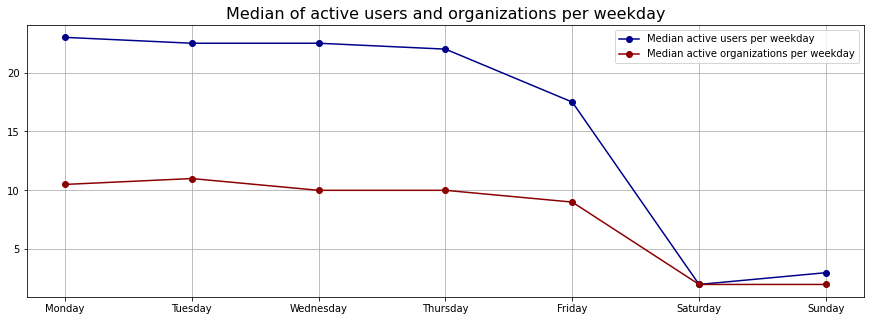

In [22]:
period = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
users = median_user_week.transpose()['median active user_id'].values
orgs = median_orgs_week.transpose()['median active organization_id'].values

plt.figure(figsize=(15,5))
plt.plot(period, users, color='darkblue', marker='o', label='Median active users per weekday')
plt.plot(period, orgs, color='darkred', marker='o', label='Median active organizations per weekday')
plt.title('Median of active users and organizations per weekday', fontsize = 16)
plt.grid(True)
plt.legend()
plt.savefig('figures/1/4_median_week', bbox_inches='tight')
plt.show()